In [1]:
from models.vae import BetaVAE
from models.gan import Generator
import utils

import torch
import torch.nn.functional as F
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

vae = BetaVAE(beta=10.).to(device)
vae.load_state_dict(torch.load('demo_weights/betavae.pt'))
generator = Generator(256+20, 64).to(device)
generator.load_state_dict(torch.load('demo_weights/generator.pt'))
generator.eval()
generator.requires_grad_(False);

In [7]:
latent_inds = [4, 6, 7, 9, 10, 11, 12, 13, 15, 17, 18, 19]
nrow = 8
torch.manual_seed(10)

def vae_features():
    c = F.one_hot(torch.tensor(latent_inds), num_classes=20)
    c = (c[:, None, :] * torch.linspace(-3, 3, nrow)[:, None]).view(-1, 20).to(device)
    samples = vae.decode(c).cpu()
    plt.figure(figsize=(2*nrow, 2*len(latent_inds)))
    plt.imshow(make_grid(samples, nrow=nrow).permute(1, 2, 0))
    plt.show()
    
def compare_latent_features_(random_seed):
    torch.manual_seed(random_seed)
    z = torch.randn(256).to(device)
    c = F.one_hot(torch.tensor(latent_inds), num_classes=20)
    c = (c[:, None, :] * torch.linspace(-3, 3, nrow)[:, None]).view(-1, 20).to(device)
    zc = torch.cat([z.repeat((len(latent_inds) * nrow, 1)), c], axis=1)
    samples = generator(zc).cpu()
    plt.figure(figsize=(2*nrow, 2*len(latent_inds)))
    plt.imshow(make_grid(samples, nrow=nrow).permute(1, 2, 0))
    plt.show()

def explore_latent_features(latent_ind):
    c = F.one_hot(torch.tensor([latent_ind]), num_classes=20)
    c = (c * torch.linspace(-3, 3, nrow)[:, None]).to(device)
    vae_samples = vae.decode(c)

    z = torch.randn(7, 256).to(device)
    zc = torch.cat([z.unsqueeze(1).repeat(1, nrow, 1), c.unsqueeze(0).repeat(7, 1, 1)], axis=-1).view(-1, 256+20)
    gan_samples = generator(zc)
    samples = torch.cat([vae_samples, gan_samples]).cpu()
    plt.figure(figsize=(2*nrow, 2*8))
    plt.imshow(make_grid(samples, nrow=nrow).permute(1, 2, 0))
    plt.show()
   

## Explore latent features of vae
In vae latent space, vary one feature from low to high while keeping all other 19 constant (0). For additional latent features of gan, randomly sample 7 vectors and compare.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


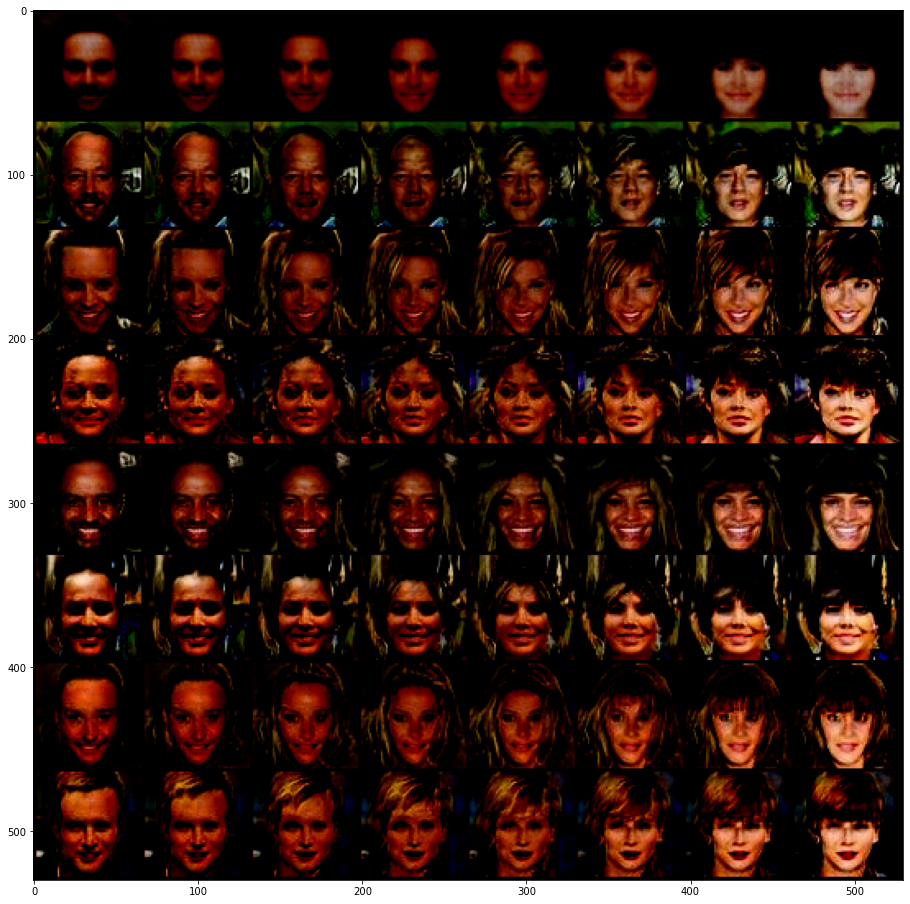

In [8]:
explore_latent_features(4)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


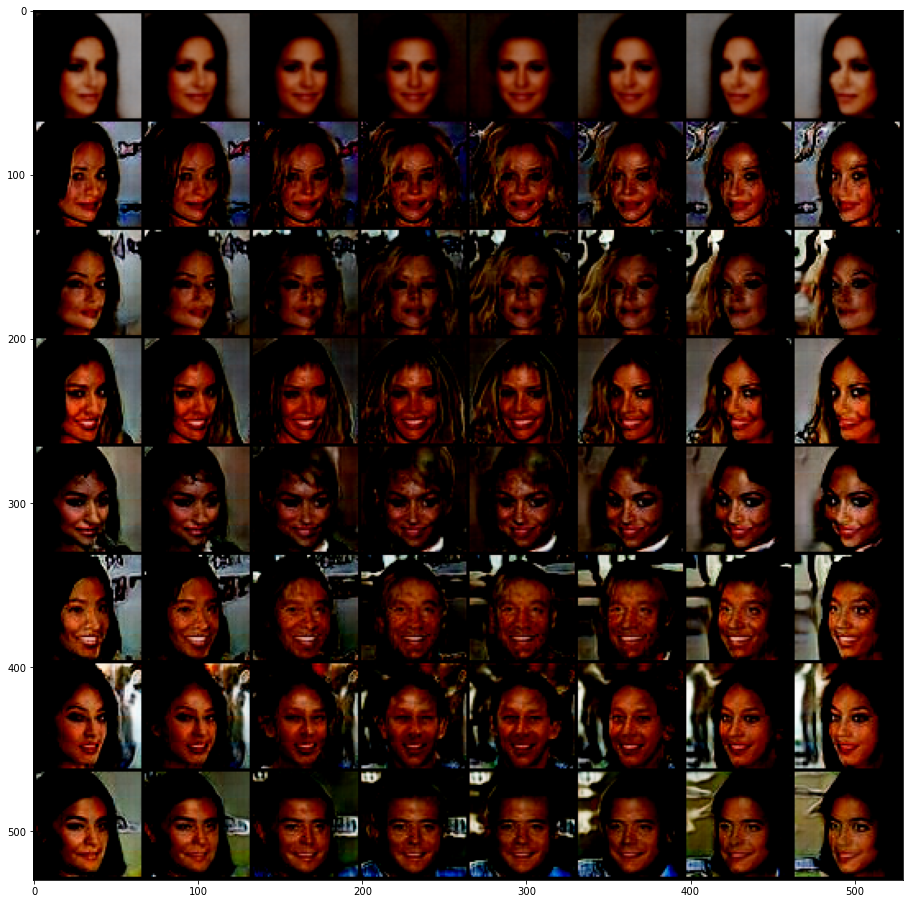

In [9]:
explore_latent_features(19)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


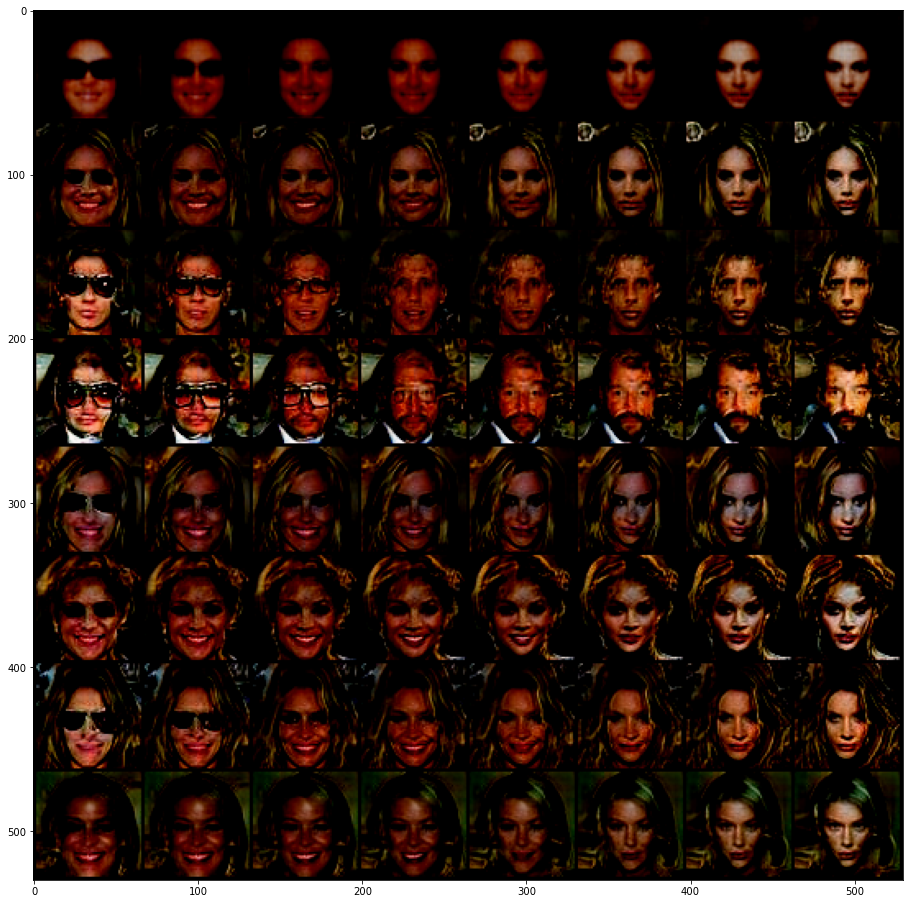

In [10]:
explore_latent_features(18)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


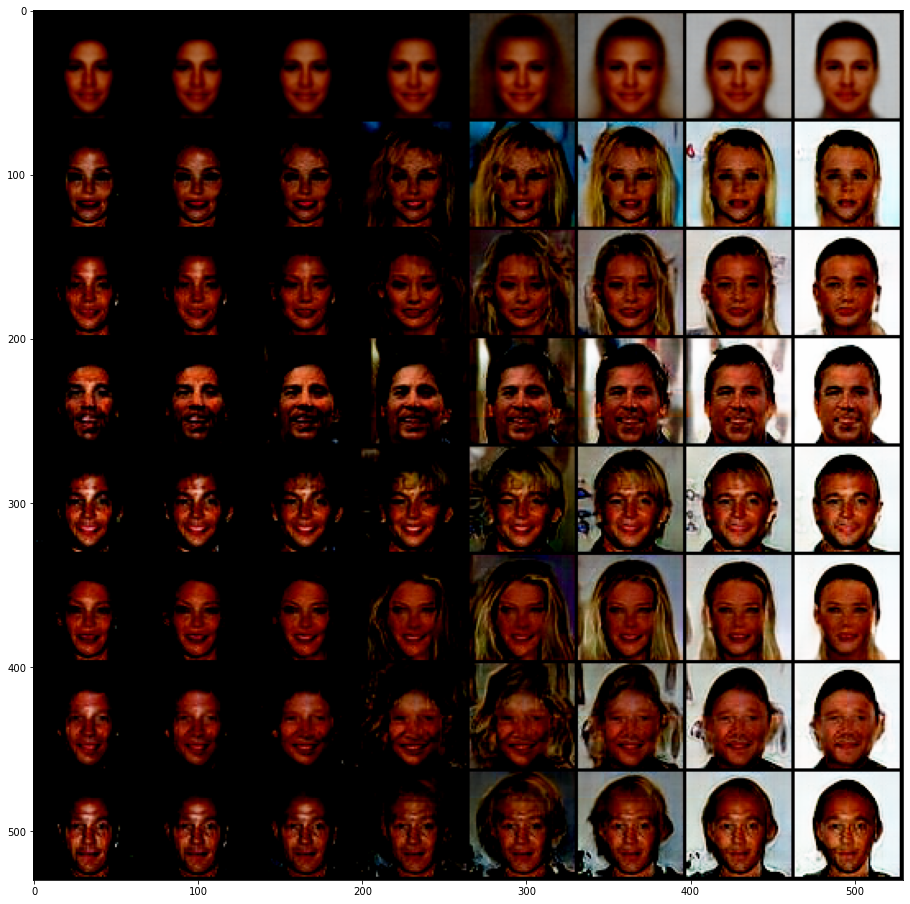

In [11]:
explore_latent_features(12)